# Pratik Kadam 
Pizza Classification (It's Burn or Not)

* Using Convolution Neural Network
                      

### Problem Statement
A famous 30 year old pizza brand which has outlets in more than 90 countries started home
delivery services a couple of years ago and the business has grown much faster than expected.
However, outlet vendors are very much disappointed with few customers for their cheating
activities. This is because vendors, shockingly, came to know that few customers after receiving the
delivery are raising tickets for refund in the name of burnt pizzas. Even though customers received
a good pizza but still few customers are trying to cheat vendors. To overcome this issue, Franchise
has come up with an idea to integrate a pizza detection model in their application where customers
can upload images for the burnt pizzas delivered. For example, if I have received a burnt pizza then
I can upload a couple of images of the pizza to the application and it will classify the pizza as burnt
or good in order to process my refund ticket.

#### Goal : 
You are hired as Deep Learning Engineer by a famous pizza franchise. You are asked to builda model where it accepts the images of pizza and detects as burnt pizza or good pizza.

### Libraries Importing

In [27]:
from keras.models import Sequential
from keras.layers import Convolution2D  # convolution Layer
from keras.layers import MaxPooling2D   # Pooling Layer
from keras.layers import Flatten        # Flatten
from keras.layers import Dense          # Hidden Layer & Output Layer

#### Ignore Warnings

In [28]:
import warnings 
warnings.filterwarnings("ignore")

* CNN Conatains These Layers:
1) Convolution Layer
2) Pooling Layer
3) Flatten Layer

In [29]:
# Initialising the CNN
classifier = Sequential()

In [30]:
# CNN - 1 
# Step 1 - Convolution Layer

classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

In [31]:
# Step 2 - Pooling Layer

classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [32]:
# CNN -

classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [33]:
# Flattening Layer 

classifier.add(Flatten())

In [34]:
# Step 4 - Full connection  ( Neural Netwokr)

classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 1, activation = 'sigmoid'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [35]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [37]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r"D:\PGA WE DL EXAM\PGA Wkend DL Exam\Datasets\ANN\Pizza Refund\train",
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'binary') # binary because we have 2 type = cat / dogs

test_set = test_datagen.flow_from_directory(r"D:\PGA WE DL EXAM\PGA Wkend DL Exam\Datasets\ANN\Pizza Refund\test1",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 709 images belonging to 2 classes.
Found 40 images belonging to 1 classes.


In [38]:
label = training_set.class_indices
label

{'Burnt_pizza': 0, 'Good_pizza': 1}

In [39]:
result = classifier.fit(training_set,
                         epochs=10, # iteration or repeat 
                         validation_data = test_set)

Epoch 1/10
23/23 [==============================] - 124s 5s/step - loss: 0.6459 - accuracy: 0.5952 - val_loss: 1.1829 - val_accuracy: 0.0000e+00
Epoch 2/10
23/23 [==============================] - 84s 4s/step - loss: 0.6122 - accuracy: 0.6150 - val_loss: 0.9141 - val_accuracy: 0.2500
Epoch 3/10
23/23 [==============================] - 138s 6s/step - loss: 0.5455 - accuracy: 0.7588 - val_loss: 1.3482 - val_accuracy: 0.2000
Epoch 4/10
23/23 [==============================] - 37s 2s/step - loss: 0.4846 - accuracy: 0.7842 - val_loss: 1.2953 - val_accuracy: 0.4000
Epoch 5/10
23/23 [==============================] - 38s 2s/step - loss: 0.3920 - accuracy: 0.8420 - val_loss: 1.0770 - val_accuracy: 0.5250
Epoch 6/10
23/23 [==============================] - 38s 2s/step - loss: 0.3717 - accuracy: 0.8449 - val_loss: 0.7020 - val_accuracy: 0.6000
Epoch 7/10
23/23 [==============================] - 36s 2s/step - loss: 0.3522 - accuracy: 0.8759 - val_loss: 1.6357 - val_accuracy: 0.4500
Epoch 8/10
23/

In [40]:
classifier.save('Pizza_Classifier')

INFO:tensorflow:Assets written to: Pizza_Classifier\assets


INFO:tensorflow:Assets written to: Pizza_Classifier\assets


In [41]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [42]:
model = load_model("Pizza_Classifier")

In [46]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))   # importing image is converted to 64*64
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = model.predict(raw_img)[0][0]  # probability
    plt.imshow(cv2.imread(path))                # Display Image
    print('Probability : ',Probability)
    if Probability > 0.5:
        print("======>>>>> It's a Normal Pizza")
    else:
        print("======>>>>> It's Burnt Pizza")

In [47]:
import os 
os.chdir(r"D:\PGA WE DL EXAM")

1/1 [==============================] - 0s 48ms/step
Probability :  0.15553734
======>>>>> It's Burnt Pizza


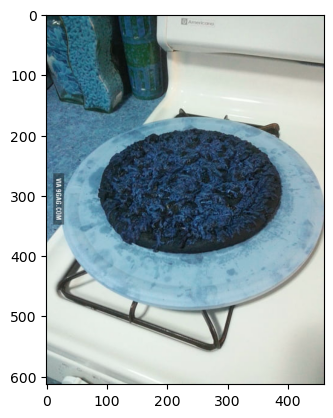

In [48]:
model_output(r"D:\PGA WE DL EXAM\burnt_pizza (32).jpg")

### Prediction : It's a Burnt Pizza

## END